In [48]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as snd
from scipy.interpolate import CubicSpline
import glob
from math import ceil, floor, sqrt
class CUBE(object):
  def __init__(self, fname):
    f = open(fname, 'r')
    for i in range(2): f.readline() # echo comment
    tkns = f.readline().split() # number of atoms included in the file followed by the position of the origin of the volumetric data
    self.natoms = int(tkns[0])
    self.origin = np.array([float(tkns[1]),float(tkns[2]),float(tkns[3])])
    tkns = f.readline().split() #
    self.NX = int(tkns[0])
    self.X = np.array([float(tkns[1]),float(tkns[2]),float(tkns[3])])
    tkns = f.readline().split() #
    self.NY = int(tkns[0])
    self.Y = np.array([float(tkns[1]),float(tkns[2]),float(tkns[3])])
    tkns = f.readline().split() #
    self.NZ = int(tkns[0])
    self.Z = np.array([float(tkns[1]),float(tkns[2]),float(tkns[3])])
    self.atoms = []
    for i in range(self.natoms):
      tkns = f.readline().split()
      self.atoms.append([float(tkns[0]), float(tkns[2]), float(tkns[3]), float(tkns[4])])
    self.atoms = np.array(self.atoms)
    self.data = np.zeros((self.NX,self.NY,self.NZ))
    i=0
    for s in f:
      for v in s.split():
        self.data[i//(self.NY*self.NZ), (i//self.NZ)%self.NY, i%self.NZ] = float(v)
        i+=1
    if i != self.NX*self.NY*self.NZ: raise NameError("FSCK!")

In [85]:
cube = None

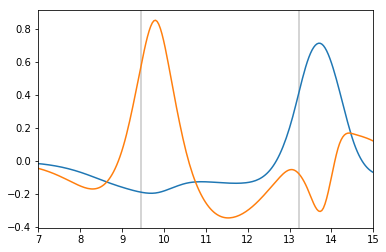

In [101]:
def plot_cubes(mol, sites, xmin, xmax):
    for site in sites:
        cube1 = CUBE('cp2k-dens/n2/%s/up-%d/CO-long-ELECTRON_DENSITY-1_0.cube' % (mol, site))
        cube2 = CUBE('cp2k-dens/n2/%s/dn-%d/CO-long-ELECTRON_DENSITY-1_0.cube' % (mol, site))
        xs = np.linspace(0, cube1.X[0]*(1+cube1.NX),cube1.NX)
        ys = (cube1.data - cube2.data).sum(axis=1).sum(axis=0)
        xss = np.linspace(min(xs), max(xs), 500)
        yss = CubicSpline(xs, ys)(xss)
        plt.plot(xss,yss)
        for pos in cube1.atoms[:, 3]:
            plt.axvline(pos, color='lightgray', zorder=-10)
    plt.xlim(xmin, xmax)
plot_cubes('co-long', (2, 1), 7, 15)

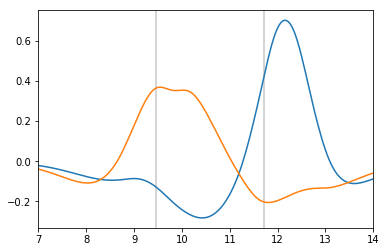

In [100]:
plot_cubes('co-short', (2, 1), 7, 14)

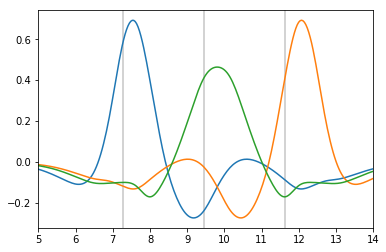

In [99]:
plot_cubes('co2', (1, 3, 2), 5, 14)